In [20]:
import pandas_datareader as pdr 
df = pdr.get_data_yahoo('GOOG')
df1 = df[df['Volume']>0]

In [21]:
data_source = r'C:\Users\user\Desktop\Grad\PY Modules\GOOG.xlsx'
df1.to_excel(data_source)

In [22]:
import pandas as pd 
import numpy as np
df = pd.read_excel(r'C:\Users\user\Desktop\Grad\PY Modules\GOOG.xlsx')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-07-06,525.250000,519.000000,519.500000,522.859985,1280500,522.859985
1,2015-07-07,526.179993,515.179993,523.130005,525.020020,1597200,525.020020
2,2015-07-08,522.734009,516.109985,521.049988,516.830017,1296700,516.830017
3,2015-07-09,523.770020,520.349976,523.119995,520.679993,1842300,520.679993
4,2015-07-10,532.559998,525.549988,526.289978,530.130005,1956700,530.130005


In [34]:
class Strategy:
    def __init__(self): 
        self.t_name =  t_name 
        self.short_win = short_win
        self.long_win = long_win
        self.cond = df.index > self.long_win
        self.trade_price = df['Open']
        self.close = df['Adj Close']
        
    def smav(self): 
        self.smav = np.where(Strategy().cond, Strategy().close.rolling(window =Strategy().short_win).mean(), 0)
        return self.smav
    
    def lmav(self): 
        self.lmav = np.where(Strategy().cond, Strategy().close.rolling(window =Strategy().long_win).mean(), 0)
        return self.lmav
    
    def trend_day(self): 
        self.trend_day = np.where(Strategy().lmav() > Strategy().smav(), 1, 
                            np.where(Strategy().lmav() < Strategy().smav(),-1,0))
        return self.trend_day
    
    def prev_trend_day (self):
        self.prev_trend_day = np.where(Strategy().cond, np.roll(Strategy().trend_day(), 1), 0)
        return self.prev_trend_day 
    def diff_trend_day (self): 
        self.diff_trend_day = Strategy().trend_day() + Strategy().prev_trend_day()
        return self.diff_trend_day
     
                             
                             
#global variable 
t_name = 'mav'
short_win = 5
long_win = 20

s= Strategy()

df ['smav'] = s.smav()
df ['lmav'] = s.lmav()
df ['trend_day'] = s.trend_day()
df['prev_trend_day'] = s.prev_trend_day()
df['diff_trend_day'] = s.diff_trend_day ()


In [33]:
class Signal:
    def __init__(self):
        pass
    def trade_signal(self):
        self.trade_signal = np.where(Strategy().diff_trend_day() ==0, Strategy().trend_day(), 0)
        return self.trade_signal 
    def order (self): 
        self.order = np.where(Strategy().cond, np.roll(Signal().trade_signal(), 1), 0)
        return self.order 
    
    
    
ts = Signal()
    
df['trade_signal'] =  ts.trade_signal()
df['order'] = ts.order()

,Date,High,Low,Open,Close,Volume,Adj Close,smav,lmav,trend_day,prev_trend_day,diff_trend_day,trade_signal,order,long_amt,short_amt,cash_delta,end_bal,end_pos,pnl
100,2015-11-24,755.278992,737.630005,752.000000,748.280029,2333100,748.280029,747.853992,730.371997,-1,-1,-2,0,0,-0.000000,0.000000,0.000000,10072.519958,0,10072.519958
101,2015-11-25,752.000000,746.059998,748.140015,748.150024,1122100,748.150024,749.483997,732.131998,-1,-1,-2,0,0,-0.000000,0.000000,0.000000,10072.519958,0,10072.519958
102,2015-11-27,753.409973,747.489990,748.460022,750.260010,838500,750.260010,751.854004,733.798999,-1,-1,-2,0,0,-0.000000,0.000000,0.000000,10072.519958,0,10072.519958
103,2015-11-30,754.929993,741.270020,748.809998,742.599976,2097600,742.599976,749.054004,735.388498,-1,-1,-2,0,0,-0.000000,0.000000,0.000000,10072.519958,0,10072.519958
104,2015-12-01,768.950012,746.700012,747.109985,767.039978,2134600,767.039978,751.266003,737.684998,-1,-1,-2,0,0,-0.000000,0.000000,0.000000,10072.519958,0,10072.519958
105,2015-12-02,775.955017,758.960022,768.900024,762.380005,2230400,762.380005,754.085999,739.695999,-1,-1,-2,0,0,-0.000000,0.000000,0.000000,10072.519958,0,10072.519958
106,2015-12-03,768.994995,745.630005,766.010010,752.539978,2590600,752.539978,754.963989,740.917499,-1,-1,-2,0,0,-0.000000,0.000000,0.000000,10072.519958,0,10072.519958
107,2015-12-04,768.489990,750.000000,753.099976,766.809998,2757300,766.809998,758.273987,742.695499,-1,-1,-2,0,0,-0.000000,0.000000,0.000000,10072.519958,0,10072.519958
108,2015-12-07,768.729980,755.090027,767.770020,763.250000,1812300,763.250000,762.403992,744.169998,-1,-1,-2,0,0,-0.000000,0.000000,0.000000,10072.519958,0,10072.519958
109,2015-12-08,764.799988,754.200012,757.890015,762.369995,1829500,762.369995,761.469995,746.043997,-1,-1,-2,0,0,-0.000000,0.000000,0.000000,10072.519958,0,10072.519958


In [31]:
class Portfolio:
    def __init__(self):
        self.lot_size_short = 1
        self.lot_size_long = 1
        self.contract_size = 1
        self.initial_cash = 10000
        self.short_amt = (1)* np.where (Signal().order()== -1, self.lot_size_short*
                                        self.contract_size*Strategy().trade_price, 0)
        self.long_amt = (-1)* np.where (Signal().order()==1, self.lot_size_long*
                                        self.contract_size*Strategy().trade_price, 0)
        
    def cash_delta(self): 
        self.cash_delta = Portfolio().long_amt + Portfolio().short_amt 
        return self.cash_delta
    def end_bal(self): 
        self.end_bal = Portfolio().initial_cash + Portfolio().cash_delta().cumsum()
        return self.end_bal
    def end_pos(self): 
        self.end_pos = Signal().order().cumsum()
        return self.end_pos 
    
              
p = Portfolio()
df['long_amt'] = p.long_amt
df['short_amt'] = p.short_amt
df['cash_delta'] = p.cash_delta()
df['end_bal'] = p.end_bal()
df['end_pos'] =  p.end_pos ()

In [26]:
df['pnl'] = df['end_bal'] + (Portfolio().end_pos() * Strategy().trade_price*Portfolio().contract_size)
df[:-1]

,Date,High,Low,Open,Close,Volume,Adj Close,smav,lmav,trend_day,prev_trend_day,diff_trend_day,trade_signal,order,long_amt,short_amt,cash_delta,end_bal,end_pos,pnl
0,2015-07-06,525.250000,519.000000,519.500000,522.859985,1280500,522.859985,0.000000,0.000000,0,0,0,0,0,-0.000000,0.0,0.000000,10000.000000,0,10000.000000
1,2015-07-07,526.179993,515.179993,523.130005,525.020020,1597200,525.020020,0.000000,0.000000,0,0,0,0,0,-0.000000,0.0,0.000000,10000.000000,0,10000.000000
2,2015-07-08,522.734009,516.109985,521.049988,516.830017,1296700,516.830017,0.000000,0.000000,0,0,0,0,0,-0.000000,0.0,0.000000,10000.000000,0,10000.000000
3,2015-07-09,523.770020,520.349976,523.119995,520.679993,1842300,520.679993,0.000000,0.000000,0,0,0,0,0,-0.000000,0.0,0.000000,10000.000000,0,10000.000000
4,2015-07-10,532.559998,525.549988,526.289978,530.130005,1956700,530.130005,0.000000,0.000000,0,0,0,0,0,-0.000000,0.0,0.000000,10000.000000,0,10000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2020-06-24,1475.420044,1429.750000,1461.510010,1431.969971,1756000,1431.969971,1443.183984,1435.944495,-1,-1,-2,0,0,-0.000000,0.0,0.000000,10524.059875,0,10524.059875
1253,2020-06-25,1442.900024,1420.000000,1429.900024,1441.329956,1230500,1441.329956,1444.257983,1437.174493,-1,-1,-2,0,0,-0.000000,0.0,0.000000,10524.059875,0,10524.059875
1254,2020-06-26,1433.449951,1351.989990,1431.390015,1359.900024,4267700,1359.900024,1429.893994,1433.723492,1,-1,0,1,0,-0.000000,0.0,0.000000,10524.059875,0,10524.059875
1255,2020-06-29,1395.599976,1347.010010,1358.180054,1394.969971,1810200,1394.969971,1418.515991,1431.880994,1,1,2,0,1,-1358.180054,0.0,-1358.180054,9165.879822,1,10524.059875


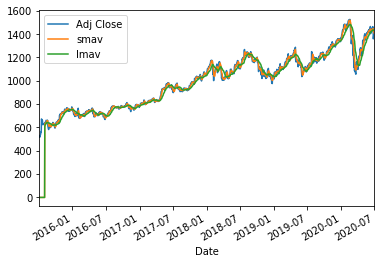

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline 
df1 = df.set_index('Date')
BBands = df1[['Adj Close','smav','lmav']].plot()

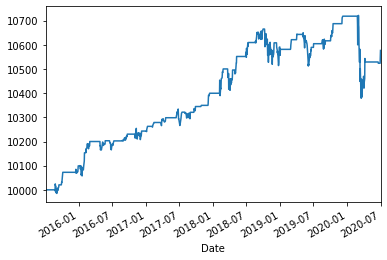

In [28]:
df1 = df.set_index('Date')
print_pnl = df1['pnl'].plot()
